In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this to inline for matplotlib
%matplotlib inline

In [52]:
# Import a TSV Data set from URL
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

chipo = pd.read_csv(url, sep = '\t')

In [53]:
# see the first 10 entries
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [54]:
# Show properties relate to data

chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(2), object(3)
memory usage: 180.6+ KB


In [55]:
chipo.shape[0]

4622

In [56]:
chipo.shape[1]

5

In [57]:
chipo.columns # print the name of all the columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [58]:
chipo.index # This shows how the dataset has been indexed

RangeIndex(start=0, stop=4622, step=1)

In [59]:
# Which was the most ordered item?
chipo.item_name.value_counts().head(1)

Chicken Bowl    726
Name: item_name, dtype: int64

In [60]:
# How many items were ordered
mostOrd = chipo.item_name.value_counts().max()
mostOrd

726

In [61]:
# How many items were ordered - Option 2
mostOrd2 = chipo["item_name"].value_counts().max()
mostOrd2

726

In [62]:
# What was the most ordered item in choice_description
chipo.choice_description.value_counts().head()

[Diet Coke]                                                                          134
[Coke]                                                                               123
[Sprite]                                                                              77
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                42
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]     40
Name: choice_description, dtype: int64

In [63]:
# How many items were ordered in total?
total_items_orders = chipo.quantity.sum()
total_items_orders

4972

In [64]:
dollarizer = lambda x: float(x[1:-1])
chipo.item_price = chipo.item_price.apply(dollarizer)
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
6,3,1,Side of Chips,NaN,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25


In [65]:
# What was the revenue?
chipo.item_price.sum()

34500.16

In [66]:
# How many orders were made in the period?
chipo.order_id.value_counts().count()

1834

In [50]:
# What is the average amount per order?
order_grouped = chipo.groupby(by=['order_id']).sum()
order_grouped.mean()['item_price']

18.81142857142869

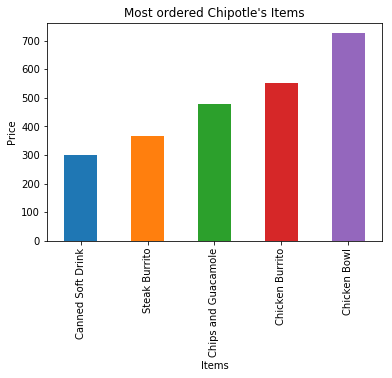

In [70]:
# Visualize a histogram
# Create a histogram of the top 5 items bought

#get the series of the names
x = chipo.item_name

# Use the Counter class from collections to create a dictionary with keys(text) and frequency
letter_counts = Counter(x)

# convert the dictionary to a Dataframe
df = pd.DataFrame.from_dict(letter_counts, orient='index')

#df

# sort the values from the top to the least value and slice the first 5 items
df = df[0].sort_values(ascending = True)[45:50]

# create the plot
df.plot(kind='bar')

#Set the title and labels
plt.xlabel('Items')
plt.ylabel('Price')
plt.title('Most ordered Chipotle\'s Items')

# Show the plot
plt.show()

(0, 36.7178857951459)

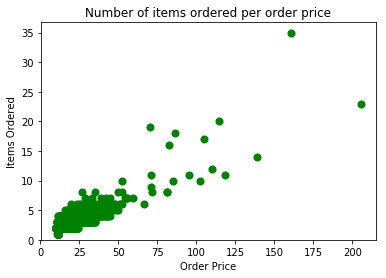

In [72]:
# Create a scatter plot
# create a list of prices
# chipo.item_price = [float(value[1:-1]) for value in chipo.item_price] #strip the dollar sign and trailing space

# then groupby the orders and sum
orders = chipo.groupby('order_id').sum()

# creates the scatter plot
plt.scatter(x = orders.item_price, y = orders.quantity, s = 50, c = 'green')

# Set the title and labels
plt.xlabel('Order Price')
plt.ylabel('Items Ordered')
plt.title('Number of items ordered per order price')
plt.ylim(0)
